#  1. Data Insights into Making a Successful Movie

* Sergio Rodriguez 
* Student pace: Full time
* Scheduled project review date/time: 12/11/20220 3pm
* Instructor name: Abhineet Kulkarni



##  Overview

Microsoft is looking to expand its footprint outside of their core lines of business, and start a new movie studio arm. The goal of our project is to analyze movie data in order to provide meaningful insights for Microsoft's new movie studio. The analysis provided answers some of the main questions a movie studio would ask for such a business venture to be successful, namely, when to release a prospective film, which genres to produce, and which studios to use, all in an attempt to generate the highest rate of return for Microsoft and their clients.


##  1. Which genres generate the highest ROI? 
       -Investigate from a profitabilty perspective i.e. ROI, which genres lead to the highest return
       -Of the genres with the highest ROI, are there any differneces that would prefer one genre to another?

In [1]:
#importing all of the libraries I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from  matplotlib.ticker import FuncFormatter

In [2]:
#creating variable with last of all files for the project
csv_files = glob('zippedData/*.csv.gz')

In [3]:
csv_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [4]:
#Using a for loop to create a dictionary with cleaned filenames
import os
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace('.csv','').replace('.','_')
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [5]:
#creating variable for movie budgets file
budgets = csv_files_dict['tn_movie_budgets_gz']

In [6]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [8]:
budgets.reset_index(inplace=True)

In [9]:
#id column provides no value so dropping
budgets.drop('id',axis=1,inplace=True)

In [10]:
#checking
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
#our budget and revenue columns are objects, we need to convert them to int or float in order to use them
#I do this using a lambda function and map method
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(str).apply(lambda x: int(x.replace(',','').replace('$','')))
budgets['production_budget'] = budgets['production_budget'].astype(str).apply(lambda x: int(x.replace(',','').replace('$','')))
budgets['domestic_gross'] = budgets['domestic_gross'].astype(str).apply(lambda x: int(x.replace(',','').replace('$','')))


In [12]:
#I also would like to convert our release date column into date time format instead of an object for later on
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [13]:
# converting release date to a date time format, creating a column for months with number (1-12) and for written i.e. Jan-Dec
import calendar
budgets['release_date'] = pd.to_datetime(budgets.release_date).sort_values(axis=0, ascending=False)
budgets['month'] = pd.DatetimeIndex(budgets.release_date).month
budgets['Month'] = budgets['month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Month
0,2009-12-18,Avatar,425000000,760507625,2776345279,12,Dec
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,May
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,Jun
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,May
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,Dec


In [15]:
#checking columns for recurring values, nothing sticks out here
for col in budgets:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{budgets[col].value_counts(normalize=True)[:5]}")
    print('-----------------------')

Currently checking values from col: release_date
Top 5 values:
2014-12-31    0.004151
2015-12-31    0.003978
2010-12-31    0.002594
2008-12-31    0.002421
2013-12-31    0.002248
Name: release_date, dtype: float64
-----------------------
Currently checking values from col: movie
Top 5 values:
King Kong    0.000519
Home         0.000519
Halloween    0.000519
Crash        0.000346
The Alamo    0.000346
Name: movie, dtype: float64
-----------------------
Currently checking values from col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-----------------------
Currently checking values from col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-----------------------
Currently checking values from col: worldwide_gross
Top 5 values:
0          

Now that we have cleaned our data we can move on to creating an ROI column for our movies

In [16]:
#In order to get to ROI I am  first making a column for Profit
budgets['Profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [17]:
#checking to see our new column and sorting by profit
budgets.sort_values(by='Profit', ascending=False, inplace=True)

In [18]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Month,Profit
0,2009-12-18,Avatar,425000000,760507625,2776345279,12,Dec,2351345279
42,1997-12-19,Titanic,200000000,659363944,2208208395,12,Dec,2008208395
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4,Apr,1748134200
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,12,Dec,1747311220
33,2015-06-12,Jurassic World,215000000,652270625,1648854864,6,Jun,1433854864


In [19]:
#Now to add a column for ROI
budgets['ROI'] = (budgets['Profit'] / budgets['production_budget']) * 100

In [20]:
#Sorting and viewing movies with top ROI
budgets = budgets.sort_values(by='ROI',ascending=False)

In [21]:
# I can already see that the 5 top movies by profit are not among the top 5 movies by ROI
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI
5745,1972-06-30,Deep Throat,25000,45000000,45000000,6,Jun,44975000,179900.000000
5613,1980-03-21,Mad Max,200000,8750000,99750000,3,Mar,99550000,49775.000000
5492,2009-09-25,Paranormal Activity,450000,107918810,194183034,9,Sep,193733034,43051.785333
5679,2015-07-10,The Gallows,100000,22764410,41656474,7,Jul,41556474,41556.474000
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,Jul,247700000,41283.333333


Now I have ROI which is the target variable I will use for my investigations. 


In [22]:
#importing relevant data table with genre data, and resetting index so we have tconst as a column for later
genres = csv_files_dict['imdb_title_basics_gz']
genres.reset_index(inplace=True)

In [23]:
genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
# Renaming column we want to join on
genres.rename(columns={'primary_title' : 'movie'}, inplace=True)

In [25]:
#dfBG for dataframe Budget Genres
dfBG = budgets.set_index('movie').join(genres.set_index('movie'), how='left', on='movie')

In [26]:
#resetting index as i dont want my data to be indexed by movies
dfBG.reset_index(inplace=True)

In [27]:
dfBG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              7221 non-null   object        
 1   release_date       7221 non-null   datetime64[ns]
 2   production_budget  7221 non-null   int64         
 3   domestic_gross     7221 non-null   int64         
 4   worldwide_gross    7221 non-null   int64         
 5   month              7221 non-null   int64         
 6   Month              7221 non-null   object        
 7   Profit             7221 non-null   int64         
 8   ROI                7221 non-null   float64       
 9   tconst             3815 non-null   object        
 10  original_title     3814 non-null   object        
 11  start_year         3815 non-null   float64       
 12  runtime_minutes    3328 non-null   float64       
 13  genres             3743 non-null   object        
dtypes: datet

In [28]:
#48% of our rows for genre are missing but cannot do anything about the data we received at least for this project
dfBG.isna().sum()

movie                   0
release_date            0
production_budget       0
domestic_gross          0
worldwide_gross         0
month                   0
Month                   0
Profit                  0
ROI                     0
tconst               3406
original_title       3407
start_year           3406
runtime_minutes      3893
genres               3478
dtype: int64

In [29]:
#dropping na values as they dont have our ROI data
dfBG.dropna(inplace=True)

In [30]:
#checking
dfBG.isna().sum()

movie                0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
month                0
Month                0
Profit               0
ROI                  0
tconst               0
original_title       0
start_year           0
runtime_minutes      0
genres               0
dtype: int64

In [31]:
#checking for dupes
dfBG.movie.duplicated().sum()

1106

In [32]:
#investigating dupes, seems in the join multiple entries were made for same release date
dfBG[dfBG.movie.duplicated()]

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres
35,Cinderella,1950-02-15,2900000,85000000,263591415,2,Feb,260691415,8989.359138,tt1661199,Cinderella,2015.0,105.0,"Drama,Family,Fantasy"
36,Cinderella,1950-02-15,2900000,85000000,263591415,2,Feb,260691415,8989.359138,tt3645784,Cinderella,2013.0,120.0,Music
37,Cinderella,1950-02-15,2900000,85000000,263591415,2,Feb,260691415,8989.359138,tt5089556,Cinderella,2015.0,113.0,Fantasy
38,Cinderella,1950-02-15,2900000,85000000,263591415,2,Feb,260691415,8989.359138,tt5684194,Cinderella,2016.0,130.0,Musical
42,Home,2009-04-23,500000,15433,44793168,4,Apr,44293168,8858.633600,tt2089701,Home,2011.0,7.0,"Documentary,Drama,Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,Ten,2015-04-21,25000,0,0,4,Apr,-25000,-100.000000,tt6415838,Ten,2017.0,82.0,"Horror,Mystery,Thriller"
7190,Irreplaceable,2015-02-24,600000,0,0,2,Feb,-600000,-100.000000,tt5078326,Médecin de campagne,2016.0,102.0,"Comedy,Drama"
7191,Irreplaceable,2015-02-24,600000,0,0,2,Feb,-600000,-100.000000,tt5274738,Irreplaceable,2015.0,61.0,Drama
7200,Treading Water,2015-03-10,4700000,0,0,3,Mar,-4700000,-100.000000,tt2891054,Treading Water,2013.0,24.0,"Biography,Documentary,History"


In [33]:
#dropping duplicates below using subset release date as some movies indeed have multiple remakes 
dfBG.drop_duplicates(subset=['release_date', 'movie'], inplace=True)

In [34]:
#checking results
dfBG[dfBG.movie.duplicated(keep=False)].sort_values('movie', ascending=True).head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres
1980,A Nightmare on Elm Street,2010-04-30,35000000,63075011,117729621,4,Apr,82729621,236.370346,tt1179056,A Nightmare on Elm Street,2010.0,95.0,"Crime,Drama,Horror"
327,A Nightmare on Elm Street,1984-11-09,1800000,25504513,25504513,11,Nov,23704513,1316.917389,tt1179056,A Nightmare on Elm Street,2010.0,95.0,"Crime,Drama,Horror"
254,Aladdin,1992-11-11,28000000,217350219,504050219,11,Nov,476050219,1700.179354,tt6139732,Aladdin,2019.0,128.0,"Adventure,Comedy,Family"
1958,Aladdin,2019-05-24,182000000,246734314,619234314,5,May,437234314,240.238634,tt6139732,Aladdin,2019.0,128.0,"Adventure,Comedy,Family"
1206,Alice in Wonderland,2010-03-05,200000000,334191110,1025491110,3,Mar,825491110,412.745555,tt1014759,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"


In [35]:
dfBG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 3 to 7220
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2264 non-null   object        
 1   release_date       2264 non-null   datetime64[ns]
 2   production_budget  2264 non-null   int64         
 3   domestic_gross     2264 non-null   int64         
 4   worldwide_gross    2264 non-null   int64         
 5   month              2264 non-null   int64         
 6   Month              2264 non-null   object        
 7   Profit             2264 non-null   int64         
 8   ROI                2264 non-null   float64       
 9   tconst             2264 non-null   object        
 10  original_title     2264 non-null   object        
 11  start_year         2264 non-null   float64       
 12  runtime_minutes    2264 non-null   float64       
 13  genres             2264 non-null   object        
dtypes: datet

In [36]:
#investigating our genres column and need to make into string, create a list, and then make columns with individual genres
dfBG.genres

3       Horror,Mystery,Thriller
6         Biography,Documentary
8                        Horror
9           Action,Comedy,Drama
11              Horror,Thriller
                 ...           
7214       Drama,Romance,Sci-Fi
7217             Comedy,Romance
7218            Sci-Fi,Thriller
7219            Horror,Thriller
7220                   Thriller
Name: genres, Length: 2264, dtype: object

In [37]:
#our lambda funciton is useful for this with split method creates our list
dfBG['genres_split'] = dfBG['genres'].map(lambda x: x.split(',') if x else x)
dfBG.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres,genres_split
3,The Gallows,2015-07-10,100000,22764410,41656474,7,Jul,41556474,41556.474000,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller","[Horror, Mystery, Thriller]"
6,Bambi,1942-08-13,858000,102797000,268000000,8,Aug,267142000,31135.431235,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary","[Biography, Documentary]"
8,Night of the Living Dead,1968-10-01,114000,12087064,30087064,10,Oct,29973064,26292.161404,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,[Horror]
9,Rocky,1976-11-21,1000000,117235147,225000000,11,Nov,224000000,22400.000000,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama","[Action, Comedy, Drama]"
11,Halloween,1978-10-17,325000,47000000,70000000,10,Oct,69675000,21438.461538,tt1502407,Halloween,2018.0,106.0,"Horror,Thriller","[Horror, Thriller]"


In [38]:
#resetting index since when we dropped dupes our index values no longer match our shape
dfBG.reset_index(inplace=True)


In [39]:
dfBG.drop('index',axis=1,inplace=True)

In [40]:
dfBG.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres,genres_split
0,The Gallows,2015-07-10,100000,22764410,41656474,7,Jul,41556474,41556.474000,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller","[Horror, Mystery, Thriller]"
1,Bambi,1942-08-13,858000,102797000,268000000,8,Aug,267142000,31135.431235,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary","[Biography, Documentary]"
2,Night of the Living Dead,1968-10-01,114000,12087064,30087064,10,Oct,29973064,26292.161404,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,[Horror]
3,Rocky,1976-11-21,1000000,117235147,225000000,11,Nov,224000000,22400.000000,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama","[Action, Comedy, Drama]"
4,Halloween,1978-10-17,325000,47000000,70000000,10,Oct,69675000,21438.461538,tt1502407,Halloween,2018.0,106.0,"Horror,Thriller","[Horror, Thriller]"


In [41]:
#below we are taking our list and creating a new column with first entry in that list
dfBG['genre1'] = dfBG['genres_split'].map(lambda x: x[0])

In [42]:
#checking our genres_split to make sure is indeed list
type(dfBG.genres_split[1])

list

In [43]:
#Checking value counts to see distribution, notice that family and below have few observations in our dataset
dfBG.genre1.value_counts()

Action         545
Drama          477
Comedy         410
Adventure      199
Biography      150
Documentary    137
Horror         135
Crime          122
Animation       22
Thriller        22
Sci-Fi          11
Family           8
Fantasy          7
Mystery          6
Romance          5
Musical          4
Music            2
Western          1
War              1
Name: genre1, dtype: int64

In [44]:
#using our lambda function again here but create a variable to use as reference if movie only has 1 genre
y = 'NA'
dfBG['genre2'] = dfBG['genres_split'].map(lambda x: y if len(x) < 2 else x[1])

In [45]:
dfBG['genre3'] = dfBG['genres_split'].map(lambda x: y if len(x) < 3 else x[2])

In [46]:
#Great so now we have Genres separated and ROI time to plot
dfBG.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,The Gallows,2015-07-10,100000,22764410,41656474,7,Jul,41556474,41556.474000,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller","[Horror, Mystery, Thriller]",Horror,Mystery,Thriller
1,Bambi,1942-08-13,858000,102797000,268000000,8,Aug,267142000,31135.431235,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary","[Biography, Documentary]",Biography,Documentary,NA
2,Night of the Living Dead,1968-10-01,114000,12087064,30087064,10,Oct,29973064,26292.161404,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,[Horror],Horror,NA,NA
3,Rocky,1976-11-21,1000000,117235147,225000000,11,Nov,224000000,22400.000000,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama","[Action, Comedy, Drama]",Action,Comedy,Drama
4,Halloween,1978-10-17,325000,47000000,70000000,10,Oct,69675000,21438.461538,tt1502407,Halloween,2018.0,106.0,"Horror,Thriller","[Horror, Thriller]",Horror,Thriller,NA


[Text(0.5, 0, 'Return on Investment'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'ROI by Genre')]

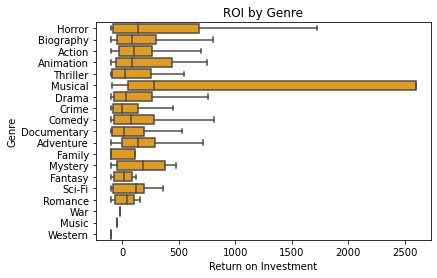

In [47]:
#running boxplot to have an idea of preliminary data looks like
#notice here that Musical although not the top has extremely large outlier as shown by error bar

sns.boxplot(x ='ROI' , y = 'genre1', data=dfBG.sort_values(by='ROI', ascending=False),showfliers=False,
            color='Orange').set(xlabel='Return on Investment', ylabel='Genre', title="ROI by Genre")


In [48]:
#investigating why musical has such a large of ROI and notice it only has 4 occurences in our data 
dfBG.genre1.value_counts()

Action         545
Drama          477
Comedy         410
Adventure      199
Biography      150
Documentary    137
Horror         135
Crime          122
Animation       22
Thriller        22
Sci-Fi          11
Family           8
Fantasy          7
Mystery          6
Romance          5
Musical          4
Music            2
Western          1
War              1
Name: genre1, dtype: int64

In [49]:
#We can see the original cinderalla was extremely successful, and heavily skews the ROI data for that genre 
dfBG[dfBG.genre1 == 'Musical']

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
9,Cinderella,1950-02-15,2900000,85000000,263591415,2,Feb,260691415,8989.359138,tt10013634,Cinderella,2018.0,150.0,Musical,[Musical],Musical,NA,NA
325,Cinderella,2015-03-13,95000000,201151353,534551353,3,Mar,439551353,462.685635,tt10013634,Cinderella,2018.0,150.0,Musical,[Musical],Musical,NA,NA
1049,The Covenant,2006-09-08,20000000,23364784,38164784,9,Sep,18164784,90.823920,tt3296724,The Covenant,2013.0,99.0,Musical,[Musical],Musical,NA,NA
1877,Standing Ovation,2010-07-16,5600000,531806,531806,7,Jul,-5068194,-90.503464,tt1303803,Standing Ovation,2010.0,105.0,Musical,[Musical],Musical,NA,NA


In [50]:
#For context there are only 10 movies in our entire data set that have an ROI greater than 8000%
dfBG[dfBG.ROI > 8000].head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,month,Month,Profit,ROI,tconst,original_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,The Gallows,2015-07-10,100000,22764410,41656474,7,Jul,41556474,41556.474000,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller","[Horror, Mystery, Thriller]",Horror,Mystery,Thriller
1,Bambi,1942-08-13,858000,102797000,268000000,8,Aug,267142000,31135.431235,tt2668120,Bambi,2013.0,58.0,"Biography,Documentary","[Biography, Documentary]",Biography,Documentary,NA
2,Night of the Living Dead,1968-10-01,114000,12087064,30087064,10,Oct,29973064,26292.161404,tt3393372,Night of the Living Dead,2014.0,79.0,Horror,[Horror],Horror,NA,NA
3,Rocky,1976-11-21,1000000,117235147,225000000,11,Nov,224000000,22400.000000,tt3080284,Rocky,2013.0,136.0,"Action,Comedy,Drama","[Action, Comedy, Drama]",Action,Comedy,Drama
4,Halloween,1978-10-17,325000,47000000,70000000,10,Oct,69675000,21438.461538,tt1502407,Halloween,2018.0,106.0,"Horror,Thriller","[Horror, Thriller]",Horror,Thriller,NA


In [51]:
#create new df with groupby for genres aggregated by median and count
#resetting the index to reference genres for our plot
# and checking our new df
genrestats = dfBG.groupby(by='genre1').agg(['median','mean', 'count'])
genrestats.reset_index(inplace=True)
genrestats.head()

genre1 production_budget                     domestic_gross  \
                        median          mean count         median   
0     Action          42500000  7.014503e+07   545     38362475.0   
1  Adventure          50000000  6.884572e+07   199     55483770.0   
2  Animation          28500000  4.148987e+07    22     28010636.5   
3  Biography          17000000  2.212839e+07   150     15613098.5   
4     Comedy          12000000  2.040214e+07   410     16416490.5   

                      worldwide_gross                      ... Profit  \
           mean count          median          mean count  ...  count   
0  7.707130e+07   545      90815558.0  2.086961e+08   545  ...    545   
1  8.452708e+07   199     115149422.0  2.318463e+08   199  ...    199   
2  8.094487e+07    22      45378743.0  1.795110e+08    22  ...     22   
3  3.229156e+07   150      25724122.0  6.509016e+07   150  ...    150   
4  3.200412e+07   410      23451168.0  5.884439e+07   410  ...    410   

          ROI                   start_year                    runtime_minutes  \
       median        mean count     median         mean count          median   
0  103.195366  213.169369   545     2014.0  2013.873394   545           108.0   
1  137.240837  204.744769   199     2014.0  2014.120603   199            98.0   
2   86.156057  866.380154    22     2014.0  2013.272727    22            87.0   
3   83.196940  486.263409   150     2014.0  2013.986667   150           112.0   
4   73.617544  206.392024   410     2013.0  2013.170732   410            99.5   

                     
         mean count  
0  110.431193   545  
1   99.256281   199  
2   85.181818    22  
3  108.613333   150  
4  100.321951   410  

[5 rows x 25 columns]

In [52]:
#most importantly here we are filtering out the genres with less than 10 observations as they dont have enough data
#for us to make a conclusion about that genre and to minimize the skew in our data i.e. musicals
genrestats1 = genrestats[genrestats['production_budget']['count'] >10]

In [53]:
budgets.describe()

,production_budget,domestic_gross,worldwide_gross,month,Profit,ROI
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,7.050675,5.989970e+07,380.016137
std,4.181208e+07,6.824060e+07,1.747200e+08,3.480147,1.460889e+08,2953.028231
min,1.100000e+03,0.000000e+00,0.000000e+00,1.000000,-2.002376e+08,-100.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,4.000000,-2.189071e+06,-50.770440
50%,1.700000e+07,1.722594e+07,2.798445e+07,7.000000,8.550286e+06,70.830983
75%,4.000000e+07,5.234866e+07,9.764584e+07,10.000000,6.096850e+07,275.834608
max,4.250000e+08,9.366622e+08,2.776345e+09,12.000000,2.351345e+09,179900.000000


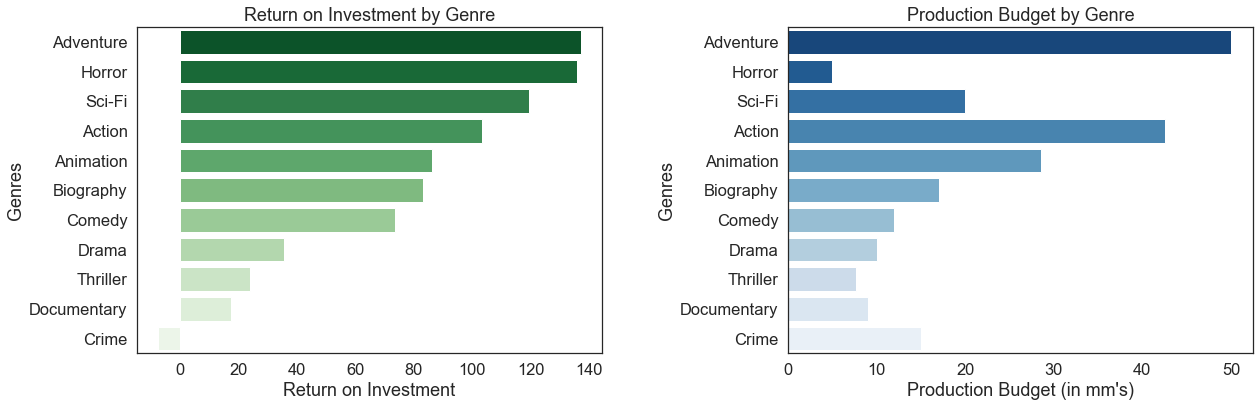

In [54]:
#Both plots below are sorted by ROI descending. The left plot show median ROI of each Genre, while the  
#right plot shows production budget of each genre

plt.figure(figsize=(20,6))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x=('ROI','median'), y=('genre1'), data=genrestats1.sort_values(('ROI','median'), ascending=False),
            palette='Greens_r').set(ylabel='Genres', xlabel=('Return on Investment'), title=("Return on Investment by Genre"))

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=('production_budget','median'), y=('genre1'), data=genrestats1.sort_values(('ROI','median'), ascending=False),
            palette='Blues_r').set(ylabel='Genres', xlabel=("Production Budget (in mm's)"), title=("Production Budget by Genre"), )
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))

plt.subplots_adjust(wspace=.4)

plt.savefig('images/ROIbyGenres1')

#(*To note this does not include the genres we dropped with less than 10 data points where otherwise)
#(*the musical genre would have been the genre with the highest ROI)

Firstly, we can see that the top 5 genres by ROI (left-plot) are Adventure, Horror, Sci-Fi, Action, and Animation
Secondly, and more importantly is that among the top 5 genres by ROI, Horror had the smallest budget yet still yielded the second highest ROI of the genres in our data set

In conclusion, on a purely profitability basis, I would suggest that MSFT make a movie in one of the top 5 genres mentioned.
If budget constraint is a material factor in this decision, horror movies would require the least amount of investment.


# 2. What are the best months to release a film?
    -Investigate how the release month of a film influences profitability and viewer metrics
    -Investigate which months would be most beneficial for profitability and viewer metrics
    -Investigate the relationship between viewer metrics and budget metrics

In [55]:
#importing file with popularity and vote information (2 versions 1 for investigating on its own and other for merge)
#When table is joined will lose substantial amount of data for audience participation so can plot that data in a vaccum
tmdb_movies = csv_files_dict['tmdb_movies_gz']
tmdb_movies1 = csv_files_dict['tmdb_movies_gz']
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [56]:
#no missing values
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [57]:
#making the release date into a date time so easier to plot
import calendar
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies.release_date).sort_values(axis=0, ascending=False)
tmdb_movies['month'] = pd.DatetimeIndex(tmdb_movies.release_date).month
tmdb_movies['Month'] = tmdb_movies['month'].apply(lambda x: calendar.month_abbr[x])

In [58]:
#checking our datetime conversion was succesful
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   month              26517 non-null  int64         
 10  Month              26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.4+ MB


In [59]:
tmdb_movies[tmdb_movies.title.duplicated()].sort_values('title')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,month,Month
9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12,1,Jan
26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2,1,Jan
21298,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107,2,Feb
14850,"[18, 10749]",253251,en,10.000 KM,4.205,2015-07-10,"10,000 km",6.5,49,7,Jul
21096,[18],334532,en,100 Streets,7.317,2016-06-08,100 Streets,6.2,91,6,Jun
...,...,...,...,...,...,...,...,...,...,...,...
1501,"[28, 18]",36410,en,Zero,0.840,2010-02-06,Zero,5.8,6,2,Feb
14765,"[53, 28, 80]",273238,en,Zero Tolerance,5.242,2015-12-01,Zero Tolerance,4.4,23,12,Dec
25031,[99],507389,en,Zion,3.201,2018-01-18,Zion,6.4,14,1,Jan
2854,"[28, 27, 878]",75735,en,Zombie Apocalypse,6.667,2011-10-29,Zombie Apocalypse,4.4,56,10,Oct


In [60]:
#dropping movies with multiple lines for same release date
tmdb_movies.drop_duplicates(subset=['release_date', 'title'],inplace=True)

In [61]:
#dropped ~1000 rows that were dupes
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25490 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25490 non-null  object        
 1   id                 25490 non-null  int64         
 2   original_language  25490 non-null  object        
 3   original_title     25490 non-null  object        
 4   popularity         25490 non-null  float64       
 5   release_date       25490 non-null  datetime64[ns]
 6   title              25490 non-null  object        
 7   vote_average       25490 non-null  float64       
 8   vote_count         25490 non-null  int64         
 9   month              25490 non-null  int64         
 10  Month              25490 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.3+ MB


In [62]:
#popularity has ~25% values of.6 but vote count also has around the same of vote count of 1,
#is logical that if a movie has only 1 vote count it is not popular
for col in tmdb_movies:
    print(f"Currently checking values from col: {col}")
    print(f"Top 6 values:\n{tmdb_movies[col].value_counts(normalize=True)[:6]}")
    print('-----------------------')

Currently checking values from col: genre_ids
Top 6 values:
[99]    0.139820
[]      0.096469
[18]    0.083052
[35]    0.063633
[27]    0.044135
[53]    0.018282
Name: genre_ids, dtype: float64
-----------------------
Currently checking values from col: id
Top 6 values:
71677     0.000039
121173    0.000039
298459    0.000039
414455    0.000039
226788    0.000039
139519    0.000039
Name: id, dtype: float64
-----------------------
Currently checking values from col: original_language
Top 6 values:
en    0.877913
fr    0.018949
es    0.017222
ru    0.011573
ja    0.009572
de    0.009062
Name: original_language, dtype: float64
-----------------------
Currently checking values from col: original_title
Top 6 values:
Home             0.000235
Aftermath        0.000196
Lucky            0.000196
Eden             0.000196
Truth or Dare    0.000196
Beyond           0.000157
Name: original_title, dtype: float64
-----------------------
Currently checking values from col: popularity
Top 6 values:
0

In [63]:
#merging our budgets data with our tmdb movie data
dfBM = pd.merge(budgets, tmdb_movies1, left_on='movie',right_on='title', how='left')
dfBM.isna().sum()

release_date_x          0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
month_x                 0
Month_x                 0
Profit                  0
ROI                     0
genre_ids            3805
id                   3805
original_language    3805
original_title       3805
popularity           3805
release_date_y       3805
title                3805
vote_average         3805
vote_count           3805
month_y              3805
Month_y              3805
dtype: int64

In [64]:
#cleaning up nas
dfBM.dropna(inplace=True)

In [65]:
#checking for dupes
dfBM[dfBM.movie.duplicated()].sort_values('movie').head()

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,month_x,Month_x,Profit,ROI,genre_ids,id,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,month_y,Month_y
4966,2011-06-24,A Better Life,10000000,1759252,1884251,6,Jun,-8115749,-81.157490,[99],418293.0,en,A Better Life,0.600,2015-05-01,A Better Life,10.0,1.0,5.0,May
1720,2010-04-30,A Nightmare on Elm Street,35000000,63075011,117729621,4,Apr,82729621,236.370346,"[27, 9648, 53]",23437.0,en,A Nightmare on Elm Street,9.795,2010-04-30,A Nightmare on Elm Street,5.5,1408.0,4.0,Apr
3061,2018-06-01,Adrift,35000000,31445011,57897191,6,Jun,22897191,65.420546,"[53, 10749, 12]",429300.0,en,Adrift,16.786,2018-06-01,Adrift,6.7,1264.0,6.0,Jun
5873,2012-12-31,After,650000,0,0,12,Dec,-650000,-100.000000,"[9648, 18]",273488.0,en,After,0.879,2014-08-08,After,4.0,1.0,8.0,Aug
5661,1951-07-28,Alice in Wonderland,3000000,0,0,7,Jul,-3000000,-100.000000,[],423971.0,en,Alice in Wonderland,0.600,2010-01-01,Alice in Wonderland,6.0,1.0,1.0,Jan


In [66]:
#dropping dupes of movies with multiple entries for same release date 
dfBM.drop_duplicates(subset=['release_date_x', 'movie'], inplace=True)

In [67]:
#checking for unique values after join, no issues
for col in dfBM:
    print(f"Currently checking values from col: {col}")
    print(f"Top 6 values:\n{dfBM[col].value_counts(normalize=True)}")
    print('-----------------------')

Currently checking values from col: release_date_x
Top 6 values:
2014-12-31    0.005058
2012-12-31    0.005058
2015-11-20    0.004047
2011-04-01    0.004047
2010-10-08    0.004047
                ...   
2012-07-05    0.000506
2019-12-31    0.000506
2011-06-29    0.000506
2014-04-16    0.000506
2016-03-01    0.000506
Name: release_date_x, Length: 887, dtype: float64
-----------------------
Currently checking values from col: movie
Top 6 values:
Home                                  0.001517
Halloween                             0.001517
Crossroads                            0.001012
The Calling                           0.001012
The Gambler                           0.001012
                                        ...   
The Longest Ride                      0.000506
Steel                                 0.000506
Eddie the Eagle                       0.000506
Captain America: The First Avenger    0.000506
The Forest                            0.000506
Name: movie, Length: 1924, dtype: f

In [68]:
dfBM.head()

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,month_x,Month_x,Profit,ROI,genre_ids,id,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,month_y,Month_y
3,2015-07-10,The Gallows,100000,22764410,41656474,7,Jul,41556474,41556.474000,"[27, 53]",299245.0,en,The Gallows,9.166,2015-07-10,The Gallows,4.8,591.0,7.0,Jul
8,1968-10-01,Night of the Living Dead,114000,12087064,30087064,10,Oct,29973064,26292.161404,[27],295154.0,en,Night of the Living Dead,0.600,2014-10-24,Night of the Living Dead,6.5,1.0,10.0,Oct
10,1978-10-17,Halloween,325000,47000000,70000000,10,Oct,69675000,21438.461538,"[53, 27]",424139.0,en,Halloween,20.839,2018-10-19,Halloween,6.4,2020.0,10.0,Oct
26,2012-01-06,The Devil Inside,1000000,53262945,101759490,1,Jan,100759490,10075.949000,"[53, 27]",76487.0,en,The Devil Inside,7.403,2012-01-06,The Devil Inside,4.7,441.0,1.0,Jan
29,1915-02-08,The Birth of a Nation,110000,10000000,11000000,2,Feb,10890000,9900.000000,[18],339408.0,en,The Birth of a Nation,8.152,2016-10-07,The Birth of a Nation,6.5,328.0,10.0,Oct


In [69]:
dfBM.drop(['month_y','Month_y', 'genre_ids', 'id', 'original_language'],axis=1, inplace=True)

In [70]:
dfBMgroupmonth = dfBM.groupby('Month_x').median()

In [71]:
dfBMgroupmonth.rename(columns={'month_x':'month','Month_x':'Month'},inplace=True)

In [72]:
dfBMgroupmonth.sort_values('month')

,production_budget,domestic_gross,worldwide_gross,month,Profit,ROI,popularity,vote_average,vote_count
Month_x,,,,,,,,,
Jan,23000000.0,22395806.0,41699612.0,1.0,13618920.0,79.640925,9.5410,6.10,677.0
Feb,21500000.0,23323780.0,43953337.0,2.0,15002294.5,73.205699,9.0905,5.90,665.5
Mar,16900000.0,18525139.5,25923720.5,3.0,7731684.0,50.499016,9.1365,6.10,477.0
Apr,15000000.0,10749115.5,21900456.5,4.0,4662703.5,39.113181,8.3785,6.25,411.5
May,20000000.0,34121140.0,45671512.0,5.0,15852177.0,82.230542,9.6070,6.20,591.0
Jun,24500000.0,40494279.5,68997876.0,6.0,28963580.5,125.384939,10.8320,6.30,923.0
Jul,20000000.0,33618855.0,69688384.0,7.0,31449135.0,140.459267,10.1960,6.30,920.0
Aug,19200000.0,24719879.0,40966716.0,8.0,15965567.0,80.199437,9.7810,6.10,620.0
Sep,15000000.0,13414714.0,25621449.0,9.0,6962436.0,41.770253,8.9740,6.30,472.0


In [73]:
dfBMgroupmonth.reset_index(inplace=True)

In [74]:
dfBMgroupmonth.head()

,Month_x,production_budget,domestic_gross,worldwide_gross,month,Profit,ROI,popularity,vote_average,vote_count
0,Apr,15000000.0,10749115.5,21900456.5,4.0,4662703.5,39.113181,8.3785,6.25,411.5
1,Aug,19200000.0,24719879.0,40966716.0,8.0,15965567.0,80.199437,9.7810,6.10,620.0
2,Dec,20000000.0,13960394.0,28717667.0,12.0,10883171.0,54.997616,9.1390,6.10,314.0
3,Feb,21500000.0,23323780.0,43953337.0,2.0,15002294.5,73.205699,9.0905,5.90,665.5
4,Jan,23000000.0,22395806.0,41699612.0,1.0,13618920.0,79.640925,9.5410,6.10,677.0


In [75]:
a = budgets.drop('movie',axis=1).sort_values('month')

In [76]:
#Creating budgets grouped by month
monthgroup = a.groupby('Month').median()


In [77]:
monthgroup = monthgroup.sort_values('month')

In [78]:
monthgroup= monthgroup.reset_index().set_index('month')

In [79]:
monthgroup.head()

,Month,production_budget,domestic_gross,worldwide_gross,Profit,ROI
month,,,,,,
1.0,Jan,14000000.0,14218868.0,20169934.0,5322212.0,51.205360
2.0,Feb,17250000.0,19096003.0,33097834.5,10443556.0,74.028042
3.0,Mar,15000000.0,15303247.5,25599836.0,7811580.5,53.132902
4.0,Apr,15000000.0,12222522.5,20068010.0,4639885.0,39.986575
5.0,May,16000000.0,19894664.0,29934477.0,13609577.0,107.574875


In [80]:
#using to esetablish 1 std move from median
budgets.describe()

,production_budget,domestic_gross,worldwide_gross,month,Profit,ROI
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,7.050675,5.989970e+07,380.016137
std,4.181208e+07,6.824060e+07,1.747200e+08,3.480147,1.460889e+08,2953.028231
min,1.100000e+03,0.000000e+00,0.000000e+00,1.000000,-2.002376e+08,-100.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,4.000000,-2.189071e+06,-50.770440
50%,1.700000e+07,1.722594e+07,2.798445e+07,7.000000,8.550286e+06,70.830983
75%,4.000000e+07,5.234866e+07,9.764584e+07,10.000000,6.096850e+07,275.834608
max,4.250000e+08,9.366622e+08,2.776345e+09,12.000000,2.351345e+09,179900.000000


In [81]:
#creating a df for blockbuster movies i.e. movies with production budgets larger than 1 std away from median
largemovies = budgets[budgets.production_budget > 75000000]

In [82]:
largegroup = largemovies.groupby('Month').agg(['median', 'count'])

In [83]:
largegroup = largegroup.sort_values(('month','median')).reset_index().set_index(('month', 'median'))
largegroup.head()

Month production_budget       domestic_gross        \
                                 median count         median count   
(month, median)                                                      
1                 Jan          92500000     8     39134289.5     8   
2                 Feb          93250000    30     81199301.0    30   
3                 Mar         122500000    50    107044925.0    50   
4                 Apr         107500000    26     80907698.0    26   
5                 May         150000000    86    180432521.5    86   

                worldwide_gross       month       Profit               ROI  \
                         median count count       median count      median   
(month, median)                                                              
1                   136038280.0     8     8   56038280.0     8   70.047850   
2                   211758557.5    30    30  116263694.0    30  112.738034   
3                   279396532.5    50    50  169535050.0    50  111.179115   
4                   228658316.5    26    26  123658316.5    26  114.076375   
5                   456971172.0    86    86  335273376.5    86  224.137303   

                       
                count  
(month, median)        
1                   8  
2                  30  
3                  50  
4                  26  
5                  86

Now that we have all of our relevant data, we are ready to plot.

In [84]:
budgets['budget_range'] = budgets.production_budget.map(
    lambda x: '$0 - $50mm' if x<50000000 else('$50mm - $100mm' if x<100000000 else '$100mm+'))

First, I am going to look into to see how popularity, vote counts(viewer counts) and vote rating vary by production budget

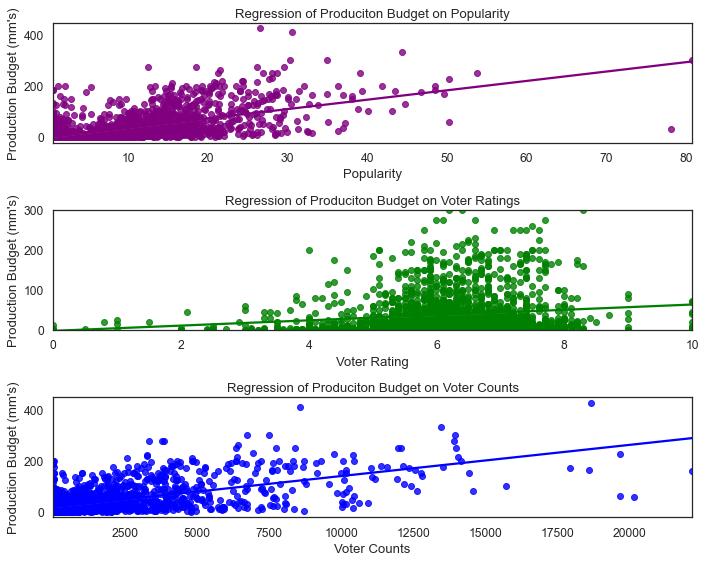

In [85]:
#Below I am running a regression on Popularity Vote average(vote/movie ratings), and vote counts
#by production budget
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.1)
sns.set_style('white')
ax = plt.subplot(3,1,1)
ax = sns.regplot(y='production_budget', x='popularity', data=dfBM.sort_values('month_x'), marker="o",
             color='Purple', ci=False).set(
    xlabel='Popularity', title='Regression of Produciton Budget on Popularity', ylabel="Production Budget (mm's)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))

ax1 = plt.subplot(3,1,2)
ax1 = sns.regplot(y='production_budget', x='vote_average', data=dfBM.sort_values('month_x'), ci=False, 
             color='Green', marker="o").set(
    xlabel='Voter Rating', title='Regression of Produciton Budget on Voter Ratings', ylabel="Production Budget (mm's)",
    ylim=(0,300000000))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))

ax1 = plt.subplot(3,1,3)
ax1 = sns.regplot(y='production_budget', x='vote_count', data=dfBM.sort_values('month_x'), ci=False, 
             color='Blue', marker="o").set(
    xlabel='Voter Counts', title='Regression of Produciton Budget on Voter Counts', ylabel="Production Budget (mm's)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))


plt.tight_layout()
plt.savefig('images/prodvoteregress')



We can see that production budget is positively related from the upward sloping line for all three variables, most with popularity. With respect to voter ratings the relationship is less meaningful and leads us to conclude that although a larger production budget is beneficial to making a movie lower budget films can still be big hits to our viewers

Now we will look at Gross Revenue, Budget, ROI, and Voter Participation by Month

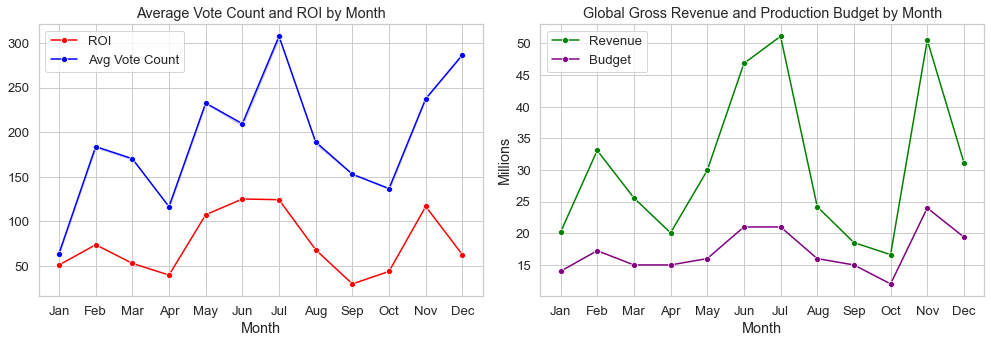

In [86]:
plt.figure(figsize=(14,5))

sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
ax = plt.subplot(1,2,1)
ax = sns.lineplot(x='Month', y='ROI', data=monthgroup.sort_values('month'), 
                  marker='o', legend='brief', label='ROI', ci=False, color='red')

ax = sns.lineplot(x='Month', y='vote_count', data=tmdb_movies.sort_values('month'),
                   ci=False, marker='o', legend='brief', color='blue', label='Avg Vote Count')
plt.xlabel('Month')
plt.ylabel('')
plt.title('Average Vote Count and ROI by Month')

ax1 = plt.subplot(1,2,2)
ax1 = sns.lineplot(x='Month', y='worldwide_gross', data=monthgroup.sort_values('month'),
                   ci=False, marker='o', legend='brief', color='Green', label='Revenue')
ax1 = sns.lineplot(x='Month', y='production_budget', data=monthgroup.sort_values('month'),
                   ci=False, marker='o', legend='brief', color='Purple', label='Budget')
plt.xlabel('Month')
plt.ylabel('Millions')
plt.title('Global Gross Revenue and Production Budget by Month')


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))
plt.savefig('images/monthcharts1')

plt.tight_layout()

We can see in the graphs above the months with highest participation of viewers are July, December, November, and May respectively. From a gross revenue perspective, the highest grossing months are July, November, June, and December

So whether the goal of the film is for critical acclaim or maximizing return, July and November are the best months.


One additonal consideration is when are the 'Blockbuster' movies released? Given viewers only have a finite amount of time of which they can consume movies, it is likely viewers will not see every movie that is in theatres for a given month, but they will gravitate towards the top movies to be released that month.

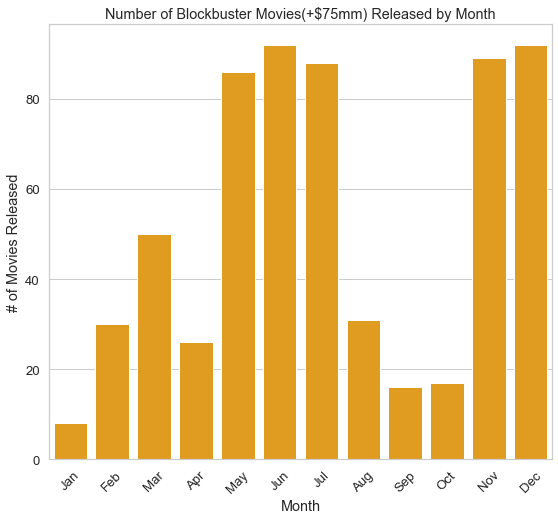

In [87]:
#Here I plot number of movies with a production budget greater than 75mio by month to see when the larger movies are released
plt.figure(figsize=(9,8))
sns.set_style("whitegrid")
sns.barplot(y=('production_budget','count'), x='Month', 
             data=largegroup, color='orange',
             ci=False).set(ylabel='# of Movies Released', title='Number of Blockbuster Movies(+$75mm) Released by Month' )

plt.xticks(rotation=45)
plt.savefig('images/blockbuster1')


As shown above, the months with highest number of movies released unsurprisingly are June, July, November and December. If MSFT plans on testing the waters first in film making and/or has a lower production budget for the film I would suggest they consider releasing their film in May or February as they are not the most crowded months with movie releases and still have higher ROI's then the other months

# 3. Which studios have a proven track record of producing high ROI films?
    -Find highest ROI producing studios
    -Investigate whether high ROI studio's are consistent across production budget constraint
    

In [88]:
#importing file with studio data
studio = csv_files_dict['bom_movie_gross_gz']

In [89]:
studio.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [90]:
#resetting index to move movie names into column
studio.reset_index(inplace=True)

In [91]:
#foreign gross column values are objects not int
studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [92]:
#converting foreign gross datatype to int
studio['foreign_gross'] = studio['foreign_gross'].astype(str).apply(lambda x: float(x.replace(',','')))

In [93]:
#all movies with na values in foreign gross column have a domestic gross revenue so
#possible films were not aired internationally. filling with 0
studio[(studio.foreign_gross.isna()) & (studio.domestic_gross == 0)]

,title,studio,domestic_gross,foreign_gross,year


In [94]:
#all domestic gross values with NaN have foreign gross so will convert to 0 not drop as they could be foreign films
studio[studio.domestic_gross.isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


In [95]:
#filling Nan values with 0 as in both cases where 1 column is Nan the other has a value
studio.domestic_gross = studio.domestic_gross.fillna(0)
studio.foreign_gross = studio.foreign_gross.fillna(0)

In [96]:
studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [97]:
studio[studio.studio.isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,0.0,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,0.0,2014
2825,Secret Superstar,NaN,0.0,122000000.0,2017


In [98]:
#dropping studio rows with missing values 
studio.dropna(inplace=True)

In [99]:
dfBS = pd.merge(budgets, studio, left_on='movie', right_on='title', how='left')

In [100]:
dfBS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross_x   5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
 5   month              5782 non-null   int64         
 6   Month              5782 non-null   object        
 7   Profit             5782 non-null   int64         
 8   ROI                5782 non-null   float64       
 9   budget_range       5782 non-null   object        
 10  title              1246 non-null   object        
 11  studio             1246 non-null   object        
 12  domestic_gross_y   1246 non-null   float64       
 13  foreign_gross      1246 non-null   float64       
 14  year    

In [101]:
#our studio data has 4.5k movies without studio data, will drop
dfBS.isna().sum()

release_date            0
movie                   0
production_budget       0
domestic_gross_x        0
worldwide_gross         0
month                   0
Month                   0
Profit                  0
ROI                     0
budget_range            0
title                4536
studio               4536
domestic_gross_y     4536
foreign_gross        4536
year                 4536
dtype: int64

In [102]:
#dropping values where we have no studio data
dfBS.dropna(inplace=True)

In [103]:
#index values out of whack from dropping values earlier
dfBS.reset_index(inplace=True)

In [104]:
#cleaning up our DF
dfBS.drop('index',axis=1, inplace=True)

In [105]:
dfBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1246 non-null   datetime64[ns]
 1   movie              1246 non-null   object        
 2   production_budget  1246 non-null   int64         
 3   domestic_gross_x   1246 non-null   int64         
 4   worldwide_gross    1246 non-null   int64         
 5   month              1246 non-null   int64         
 6   Month              1246 non-null   object        
 7   Profit             1246 non-null   int64         
 8   ROI                1246 non-null   float64       
 9   budget_range       1246 non-null   object        
 10  title              1246 non-null   object        
 11  studio             1246 non-null   object        
 12  domestic_gross_y   1246 non-null   float64       
 13  foreign_gross      1246 non-null   float64       
 14  year    

In [106]:
#nothing sticks out here
for col in dfBS:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{dfBS[col].value_counts(normalize=True)}")
    print('-----------------------')

Currently checking values from col: release_date
Top 5 values:
2010-10-08    0.007223
2014-10-10    0.005618
2013-12-25    0.004815
2011-04-01    0.004815
2016-03-11    0.004815
                ...   
2012-01-06    0.000803
2013-05-16    0.000803
2015-12-30    0.000803
2017-06-23    0.000803
2014-08-27    0.000803
Name: release_date, Length: 544, dtype: float64
-----------------------
Currently checking values from col: movie
Top 5 values:
Fantastic Four            0.001605
The Gambler               0.001605
The Square                0.001605
Snitch                    0.001605
The Karate Kid            0.001605
                            ...   
Immortals                 0.000803
The Vow                   0.000803
John Wick: Chapter Two    0.000803
Killing Them Softly       0.000803
My Soul to Take           0.000803
Name: movie, Length: 1237, dtype: float64
-----------------------
Currently checking values from col: production_budget
Top 5 values:
20000000    0.041734
10000000    0.04

In [107]:
#no dupes either
dfBS.duplicated().sum()

0

In [108]:
studiogroup = dfBS.groupby('studio').agg(['median','mean','count'])

In [109]:
studiogroup.reset_index(inplace=True)

In [110]:
studiogroup = studiogroup.sort_values(('ROI','count'), ascending=False)

In [111]:
studiogroup.head()

studio production_budget                     domestic_gross_x  \
                     median          mean count           median   
90   Uni.          40000000  5.639060e+07   117       62495645.0   
32    Fox          58000000  7.050455e+07   110       64538760.5   
94     WB          51500000  8.036961e+07   102       54588611.0   
82   Sony          55000000  6.825000e+07    74       79417722.0   
69   Par.          42500000  6.445946e+07    74       67964766.5   

                       worldwide_gross                      ...   ROI  \
            mean count          median          mean count  ... count   
90  9.151146e+07   117     124827316.0  2.335837e+08   117  ...   117   
32  8.554758e+07   110     166785054.0  2.435983e+08   110  ...   110   
94  8.951498e+07   102     113214342.5  2.175864e+08   102  ...   102   
82  9.540486e+07    74     180694801.0  2.378623e+08    74  ...    74   
69  8.117842e+07    74     132270082.0  1.951109e+08    74  ...    74   

   domestic_gross_y                     foreign_gross                      \
             median          mean count        median          mean count   
90       63300000.0  9.205759e+07   117    52700000.0  1.160510e+08   117   
32       64049999.5  8.460364e+07   110    98950000.0  1.584012e+08   110   
94       55200000.0  9.011667e+07   102    63150000.0  1.294422e+08   102   
82       79400000.0  9.656757e+07    74    91400000.0  1.435194e+08    74   
69       68000000.0  8.160946e+07    74    61900000.0  1.153604e+08    74   

      year                     
    median         mean count  
90  2014.0  2013.914530   117  
32  2014.0  2013.727273   110  
94  2014.0  2013.715686   102  
82  2013.0  2013.567568    74  
69  2014.0  2013.797297    74  

[5 rows x 28 columns]

Now that we've cleaned our data and created a group by for studios in the data we can begin plotting.

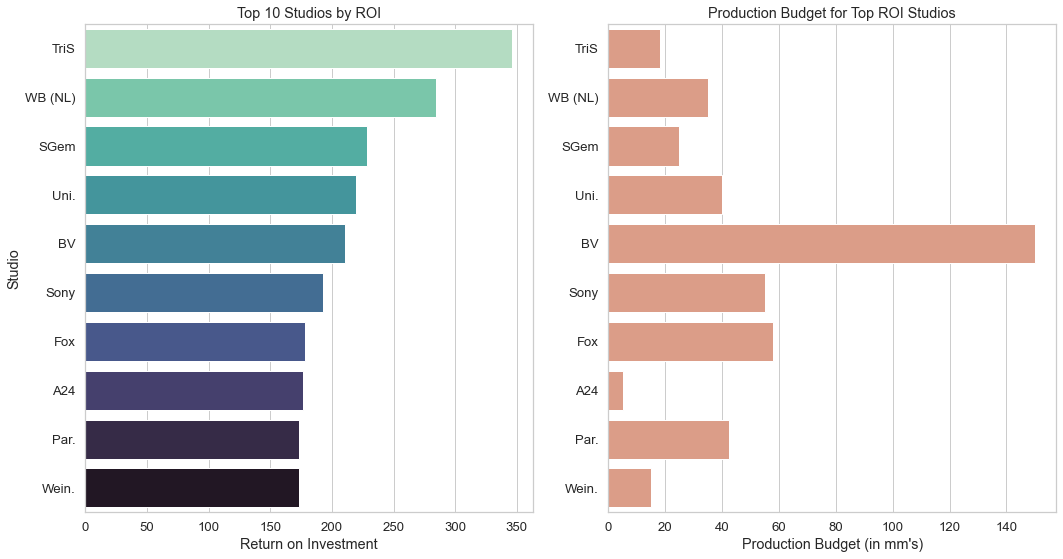

In [112]:
#plotting Studio vs ROI for studios that have made at least 3 films in our data set for top ROI studios
#for same top ROI studios, i plot beside the related production budget
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
ax = sns.barplot(x=('ROI','median'), y='studio', 
             data=studiogroup[studiogroup['ROI','count'] >10].sort_values(('ROI','median'),ascending=False).head(10),
            palette='mako_r',
             ci=False).set(ylabel='Studio', title='Top 10 Studios by ROI', xlabel="Return on Investment" )
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x=('production_budget','median'), y='studio', 
             data=studiogroup[studiogroup['ROI','count'] >10].sort_values(('ROI','median'),ascending=False).head(10),
            color='darksalmon',
             ci=False).set(ylabel='', title='Production Budget for Top ROI Studios', xlabel="Production Budget (in mm's)" )
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))

plt.tight_layout()
plt.savefig('images/topstudios')

In [113]:
studiogroup[studiogroup[('ROI','count')] < 10]

studio production_budget                     domestic_gross_x  \
                        median          mean count           median   
7      Anch.          10000000  9.805556e+06     9         139034.0   
73      RTWC           3500000  9.318750e+06     8         321281.0   
37     Gold.           6150000  1.016250e+07     8        1444007.5   
93    W/Dim.          22000000  2.406250e+07     8       21345042.0   
11        BG          11900000  1.588571e+07     7        6069605.0   
..       ...               ...           ...   ...              ...   
56       NFC           3000000  3.000000e+06     1         205842.0   
57        NM          70000000  7.000000e+07     1         619423.0   
58      Neon          11000000  1.100000e+07     1       30014534.0   
59  OMNI/FSR          20000000  2.000000e+07     1        1186538.0   
49       LGP           2000000  2.000000e+06     1          36336.0   

                       worldwide_gross                      ...   ROI  \
            mean count          median          mean count  ... count   
7   2.135824e+06     9       1605139.0  3.601722e+06     9  ...     9   
73  2.587725e+06     8       4206119.5  1.685029e+07     8  ...     8   
37  1.876920e+06     8       3922929.0  6.460682e+06     8  ...     8   
93  2.854878e+07     8      54192647.0  7.610649e+07     8  ...     8   
11  9.808936e+06     7      20718104.0  1.652466e+07     7  ...     7   
..           ...   ...             ...           ...   ...  ...   ...   
56  2.058420e+05     1       1022453.0  1.022453e+06     1  ...     1   
57  6.194230e+05     1      38992292.0  3.899229e+07     1  ...     1   
58  3.001453e+07     1      53797409.0  5.379741e+07     1  ...     1   
59  1.186538e+06     1       6093725.0  6.093725e+06     1  ...     1   
49  3.633600e+04     1       6328516.0  6.328516e+06     1  ...     1   

   domestic_gross_y                     foreign_gross                      \
             median          mean count        median          mean count   
7          109000.0  1.303722e+06     9      480000.0  5.665556e+05     9   
73         322000.0  2.596750e+06     8     2750000.0  1.363750e+07     8   
37        1450000.0  1.880012e+06     8       22900.0  3.275475e+06     8   
93       21350000.0  2.855688e+07     8    32300000.0  4.936250e+07     8   
11        6100000.0  9.809357e+06     7           0.0  1.371429e+06     7   
..              ...           ...   ...           ...           ...   ...   
56         139000.0  1.390000e+05     1      447000.0  4.470000e+05     1   
57         619000.0  6.190000e+05     1    38400000.0  3.840000e+07     1   
58       30000000.0  3.000000e+07     1    23900000.0  2.390000e+07     1   
59        1200000.0  1.200000e+06     1     3400000.0  3.400000e+06     1   
49          36300.0  3.630000e+04     1           0.0  0.000000e+00     1   

      year                     
    median         mean count  
7   2010.0  2010.555556     9  
73  2014.0  2013.875000     8  
37  2010.5  2011.125000     8  
93  2011.0  2012.125000     8  
11  2016.0  2016.000000     7  
..     ...          ...   ...  
56  2010.0  2010.000000     1  
57  2010.0  2010.000000     1  
58  2017.0  2017.000000     1  
59  2011.0  2011.000000     1  
49  2015.0  2015.000000     1  

[73 rows x 28 columns]

Above we have the top 10 studios by ROI as well as the median production budget for the respective studios. It seems that ROI is more a function of production budget. Let's investigate the top studio's shown above and if they still produce a high level of ROI across the spectrum of production budgets

In [114]:
#created new column with budget classifications
dfBS['budget_range'] = dfBS.production_budget.map(
    lambda x: '$0-$50mm' if x<50000000 else('$50mm - $100mm' if x<100000000 else '$100mm+'))

In [115]:
#checking to see values populated for all ranges
dfBS.budget_range.value_counts()

$0-$50mm          869
$50mm - $100mm    190
$100mm+           187
Name: budget_range, dtype: int64

In [116]:
#using the count from the agg method passed into my groupby I am creating a new df with studios that have made
#more than 3 films
x = studiogroup[studiogroup['production_budget','count'] >3].sort_values(('ROI','median'), ascending=False)

In [117]:
#I am then making a list out of those studios
studiolist = list(x.studio)

In [118]:
#checking list
len(studiolist)

37

In [119]:
#i only want a dataframe of the above studios
test = dfBS.set_index('studio')

In [120]:
#creating new df of studios that meet requirements of >3 movies made
stud = test[test.index.isin(studiolist)]

In [121]:
#resetting to be able to call studio in graph
stud.reset_index(inplace=True)

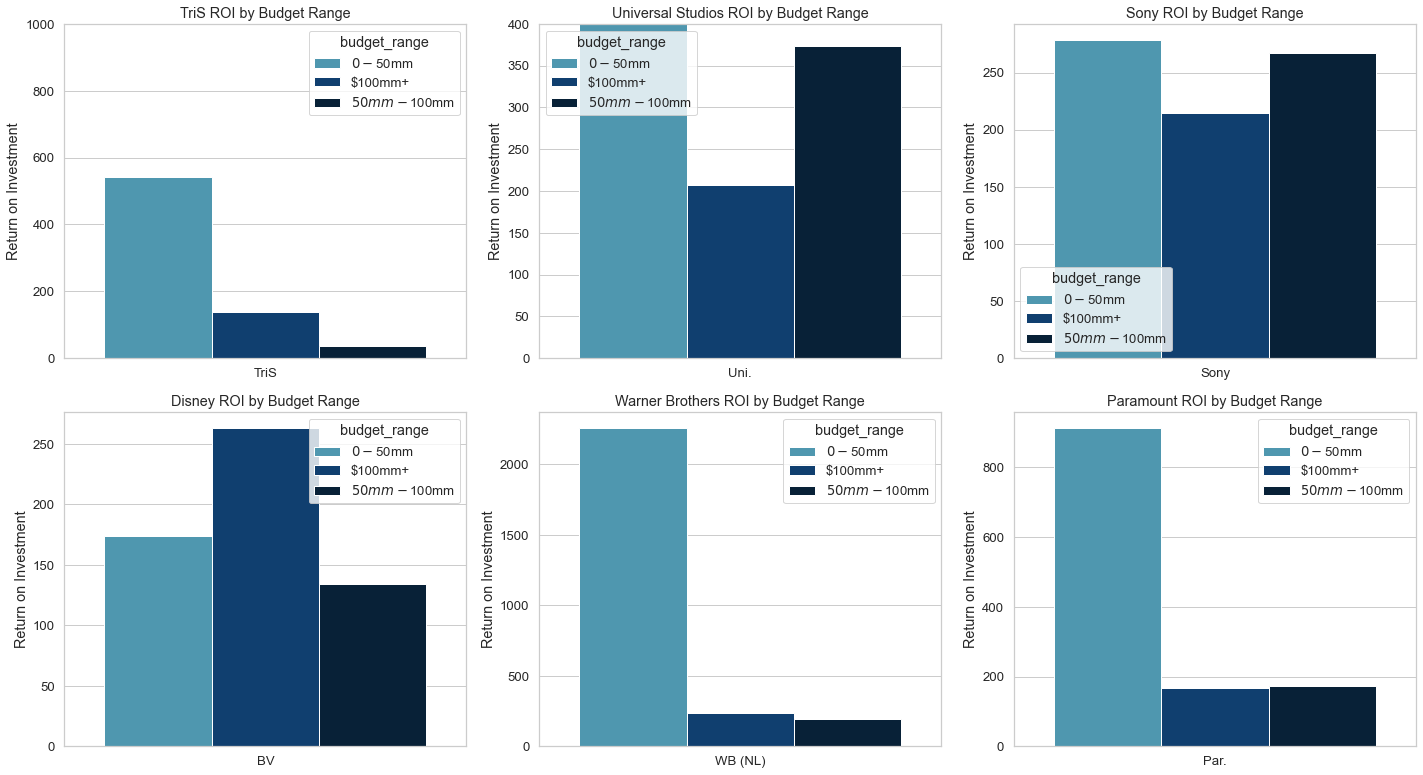

In [122]:
plt.figure(figsize=(20,11))
ax = plt.subplot(2,3,1)
ax = sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'TriS'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='TriS ROI by Budget Range',
                                      xlabel="", ylim=(0,1000) )
ax2 = plt.subplot(2,3,2)
ax2 =sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'Uni.'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='Universal Studios ROI by Budget Range',
                                      xlabel="",  ylim=(0,400))
ax3 = plt.subplot(2,3,5)
ax3 = sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'WB (NL)'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='Warner Brothers ROI by Budget Range',
                                      xlabel="" )
ax4 = plt.subplot(2,3,3)
ax4 = sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'Sony'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='Sony ROI by Budget Range',
                                      xlabel="" )
ax5 = plt.subplot(2,3,4)
ax5 = sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'BV'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='Disney ROI by Budget Range', xlabel='' )

ax6 = plt.subplot(2,3,6)
ax6 = sns.barplot(x='studio', y='ROI', hue='budget_range',
             data=stud[stud['studio'] == 'Par.'].sort_values('budget_range'),
                 palette='ocean_r',ci=False).set(ylabel='Return on Investment', title='Paramount ROI by Budget Range', xlabel='' )

plt.tight_layout()

plt.savefig('images/studioroi')

We can see that not all studios are made equal. While our top ROI studio was Tris, they are only succesful at making movies at the low end of the budget spectrum. Paramount and Warner Brothers share this same characteristic as well

Looking at other studios like Disney, Universal, and Sony they have been able to produce movies across the spectrum of production budgets while maintaining a high ROI. 

In conclusion, when selecting a studio for a film Microsoft should consider the production budget of the film. For the following production budgets they should consider these studios:

    -Low budget(0-50mm) film: TriS, Paramount, or Warner Brothers
    -Medium Budget(50-100mm) film: Universal Studios or Sony
    -High Budget(>100mm)film: Disney or Warner Brothers